<a href="https://colab.research.google.com/github/roannarum/FlaskSeries/blob/master/Data_Analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

Pandas buat bikin tabel. Struktur datanya DataFrame (2D) dan Series (1D)

In [ ]:
import pandas as pd

df = pd.read_csv('supermarket_sales.csv')

df.head()

In [ ]:
df.isna().sum()

# df = df.dropna() # Kalau ada data yang kosong bisa di remove pakai ini
# df.dropna(inplace=True) # Kalau ada data yang kosong bisa di remove pakai ini varian 2

In [ ]:
df.dtypes

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
df.describe()

# Apa perbedaan pengeluaran dari pria dan wanita pada jenis produk tertentu?

In [ ]:
df['Product line'].unique()

In [ ]:
df

In [ ]:
df.groupby(['Product line', 'Gender']).mean()

In [12]:
df_sports = df[df['Product line'] == 'Sports and travel']

In [13]:
df_sports

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,2019-01-15,16:19,Cash,562.32,4.761905,28.1160,4.5
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,2019-01-01,10:39,Credit card,435.66,4.761905,21.7830,6.9
24,549-59-1358,A,Yangon,Member,Male,Sports and travel,88.63,3,13.2945,279.1845,2019-03-02,17:36,Ewallet,265.89,4.761905,13.2945,6.0
31,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,2019-01-28,12:43,Cash,702.63,4.761905,35.1315,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,321-49-7382,B,Mandalay,Member,Male,Sports and travel,88.31,1,4.4155,92.7255,2019-02-15,17:38,Credit card,88.31,4.761905,4.4155,5.2
929,825-94-5922,B,Mandalay,Normal,Male,Sports and travel,25.31,2,2.5310,53.1510,2019-03-02,19:26,Ewallet,50.62,4.761905,2.5310,7.2
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.3700,469.7700,2019-03-30,10:18,Cash,447.40,4.761905,22.3700,7.4
982,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,2019-03-14,14:19,Ewallet,877.32,4.761905,43.8660,7.4


In [14]:
df_sports.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02,166.000000,166.000000
mean,56.993253,5.542169,15.812630,332.065220,316.252590,4.761905e+00,15.812630,6.916265
std,26.905015,2.951327,11.827397,248.375328,236.547931,1.870818e-14,11.827397,1.714477
min,10.170000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,34.417500,3.000000,6.345750,133.260750,126.915000,4.761905e+00,6.345750,5.525000
50%,58.650000,6.000000,12.901500,270.931500,258.030000,4.761905e+00,12.901500,6.700000
75%,80.680000,8.000000,22.746875,477.684375,454.937500,4.761905e+00,22.746875,8.450000
max,99.960000,10.000000,47.720000,1002.120000,954.400000,4.761905e+00,47.720000,10.000000


In [15]:
x = df_sports['Date'].unique()
y = df_sports.groupby('Date')['Quantity'].sum()

In [ ]:
x

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


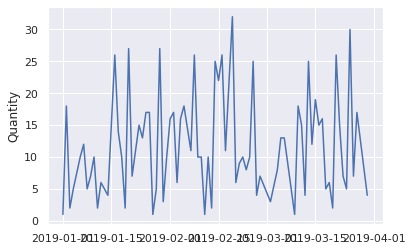

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

sns.lineplot(x, y)
plt.show()

In [18]:
df.corr(method='pearson')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000
